In [94]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression

In [2]:
# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Checking null values
for column in charity_df.columns:
    print(f"Column {column} has {charity_df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [4]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
charity_df["INCOME_AMT"].unique()

array(['0', '1-9999', '10000-24999', '100000-499999', '10M-50M',
       '25000-99999', '50M+', '1M-5M', '5M-10M'], dtype=object)

In [6]:
charity_df["APPLICATION_TYPE"].unique()

array(['T10', 'T3', 'T5', 'T7', 'T4', 'T6', 'T2', 'T9', 'T19', 'T8',
       'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15'], dtype=object)

In [7]:
charity_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [8]:
charity_df["CLASSIFICATION"].unique()

array(['C1000', 'C2000', 'C3000', 'C1200', 'C2700', 'C7000', 'C7200',
       'C1700', 'C4000', 'C7100', 'C2800', 'C6000', 'C2100', 'C1238',
       'C5000', 'C7120', 'C1800', 'C4100', 'C1400', 'C1270', 'C2300',
       'C8200', 'C1500', 'C7210', 'C1300', 'C1230', 'C1280', 'C1240',
       'C2710', 'C2561', 'C1250', 'C8000', 'C1245', 'C1260', 'C1235',
       'C1720', 'C1257', 'C4500', 'C2400', 'C8210', 'C1600', 'C1278',
       'C1237', 'C4120', 'C2170', 'C1728', 'C1732', 'C2380', 'C1283',
       'C1570', 'C2500', 'C1267', 'C3700', 'C1580', 'C2570', 'C1256',
       'C1236', 'C1234', 'C1246', 'C2190', 'C4200', 'C0', 'C3200',
       'C5200', 'C1370', 'C2600', 'C1248', 'C6100', 'C1820', 'C1900',
       'C2150'], dtype=object)

In my opinion it doesn't make sense to apply binning.

Splitting the df to two - categorical and numerical, defininf the target and features, and dropping the columns that are neither 

In [9]:
# Dropping redundant data. 
# As I think the identification columns such as EIN and NAME 
# are not making any features in our dataset
charity_reduced_df = charity_df.drop(columns=["EIN","NAME"], axis=1)
charity_reduced_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [10]:
# Creating a numeric df
numeric_columns = charity_reduced_df.dtypes[charity_reduced_df.dtypes == "int64"].index.tolist()
numeric_columns

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']

In [11]:
# Keeping only the 'STATUS' and 'ASK_AMT'. 
# The 'IS_SUCCESSFUL' will be the target
numeric_columns_df = charity_reduced_df[['STATUS', 'ASK_AMT']]
numeric_columns_df

,STATUS,ASK_AMT
0,1,5000
1,1,108590
2,1,5000
3,1,6692
4,1,142590
...,...,...
34294,1,5000
34295,1,5000
34296,1,5000
34297,1,5000


In [12]:
# Creating a categorical df - features that have to be encoded
categ_columns = charity_reduced_df.dtypes[charity_reduced_df.dtypes == "object"].index.tolist()
categ_columns

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
categ_columns_df = charity_reduced_df[['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']]
categ_columns_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,T5,Independent,C3000,ProductDev,Association,0,N


In [14]:
# Defining the target
y = charity_reduced_df['IS_SUCCESSFUL']
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [15]:
# Encoding the categorical features

# Creating a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fitting and transforming the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(categ_columns_df))
encode_df

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categ_columns)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merging encoded categorical data with numerical df
X = numeric_columns_df.merge(encode_df, left_index=True, right_index=True)
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now the features dataset has to be split to training and testing data, and then to be normalized

In [18]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Scale X_train and X_test
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.01394306, -0.03348439, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425],
       ...,
       [ 0.01394306, -0.03229417, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.03348439, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425],
       [ 0.01394306, -0.01093629, -0.12647487, ..., -0.06987849,
         0.02789425, -0.02789425]])

In [21]:
X_test_scaled

array([[ 1.39430557e-02, -3.33676580e-02, -1.26474869e-01, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02,  2.86802949e-02, -1.26474869e-01, ...,
         1.43105555e+01,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -1.26474869e-01, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       ...,
       [ 1.39430557e-02, -3.34843874e-02, -1.26474869e-01, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -1.26474869e-01, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02],
       [ 1.39430557e-02, -3.34843874e-02, -1.26474869e-01, ...,
        -6.98784891e-02,  2.78942470e-02, -2.78942470e-02]])

#### Selecting the approach

##### Will start with the Tanh activation function

First, will use one layer with 10 neurons

In [22]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
# Train the model with 50 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5909 - acc: 0.7098
Epoch 2/50
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5660 - acc: 0.7263
Epoch 3/50
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5589 - acc: 0.7289
Epoch 4/50
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5540 - acc: 0.7317
Epoch 5/50
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5513 - acc: 0.7326
Epoch 6/50
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5490 - acc: 0.7337
Epoch 7/50
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5479 - acc: 0.7336
Epoch 8/50
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5466 - acc: 0.7350
Epoch 9/50
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5455 - acc: 0.7345
Epoch 10/50
25724/25724 [==============================] - 1s 34us/sample - loss: 

The loss is very high and the accuracy level is not impressive. So I would like to tyr increasing the number of neurones upto twice as much inputs we have.

In [24]:
len(X_train_scaled[0])

116

In [25]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [26]:
# Train the model with 50 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5836 - acc: 0.7178
Epoch 2/50
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5686 - acc: 0.7287
Epoch 3/50
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5590 - acc: 0.7317
Epoch 4/50
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5530 - acc: 0.7313
Epoch 5/50
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5500 - acc: 0.7328
Epoch 6/50
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5471 - acc: 0.7336
Epoch 7/50
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5461 - acc: 0.7328
Epoch 8/50
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5445 - acc: 0.7352
Epoch 9/50
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5444 - acc: 0.7338
Epoch 10/50
25724/25724 [==============================] - 1s 48us/sample - loss: 

There is no improvement at all. I will increase the number of epochs but will apply it to the first case - with less neurons.

In [27]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5875 - acc: 0.7105
Epoch 2/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5666 - acc: 0.7269
Epoch 3/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5610 - acc: 0.7289
Epoch 4/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5567 - acc: 0.7323
Epoch 5/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5533 - acc: 0.7314
Epoch 6/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5503 - acc: 0.7336
Epoch 7/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5486 - acc: 0.7349
Epoch 8/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5475 - acc: 0.7342
Epoch 9/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5461 - acc: 0.7351
Epoch 10/100
25724/25724 [==============================] - 1s 44us/sampl

25724/25724 [==============================] - 1s 46us/sample - loss: 0.5368 - acc: 0.7393
Epoch 80/100
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5369 - acc: 0.7393
Epoch 81/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5364 - acc: 0.7399
Epoch 82/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5366 - acc: 0.7397
Epoch 83/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5365 - acc: 0.7399
Epoch 84/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5365 - acc: 0.7395
Epoch 85/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5365 - acc: 0.7391
Epoch 86/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5364 - acc: 0.7396
Epoch 87/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5366 - acc: 0.7398
Epoch 88/100
25724/25724 [==============================] - 1s 41us/sample - 

The result id not better 

Will use the combination of 100 epochs and number of neurons equal to double size of inputs. If it doesn't work will move to an additional layer.

In [29]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5843 - acc: 0.7159
Epoch 2/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5677 - acc: 0.7272
Epoch 3/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5599 - acc: 0.7296
Epoch 4/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5528 - acc: 0.7316
Epoch 5/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5498 - acc: 0.7324
Epoch 6/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5480 - acc: 0.7324
Epoch 7/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5463 - acc: 0.7338
Epoch 8/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5449 - acc: 0.7348
Epoch 9/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5436 - acc: 0.7357
Epoch 10/100
25724/25724 [==============================] - 1s 52us/sampl

25724/25724 [==============================] - 1s 51us/sample - loss: 0.5313 - acc: 0.7424
Epoch 80/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5311 - acc: 0.7435
Epoch 81/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5311 - acc: 0.7430
Epoch 82/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5309 - acc: 0.7428
Epoch 83/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5312 - acc: 0.7424
Epoch 84/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5315 - acc: 0.7418
Epoch 85/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5310 - acc: 0.7428
Epoch 86/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5311 - acc: 0.7426
Epoch 87/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5314 - acc: 0.7426
Epoch 88/100
25724/25724 [==============================] - 1s 55us/sample - 

So it's not better again. Time to try one more layer. If it doesn't improve the result then I will rty the RELU activation function.

In [31]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5826 - acc: 0.7130
Epoch 2/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5595 - acc: 0.7306
Epoch 3/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5546 - acc: 0.7324
Epoch 4/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5520 - acc: 0.7345
Epoch 5/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5504 - acc: 0.7341
Epoch 6/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5492 - acc: 0.7349
Epoch 7/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5483 - acc: 0.7339
Epoch 8/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5475 - acc: 0.7344
Epoch 9/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5468 - acc: 0.7348
Epoch 10/100
25724/25724 [==============================] - 1s 45us/sampl

25724/25724 [==============================] - 1s 49us/sample - loss: 0.5360 - acc: 0.7398
Epoch 80/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5361 - acc: 0.7400
Epoch 81/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5360 - acc: 0.7397
Epoch 82/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5359 - acc: 0.7394
Epoch 83/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5360 - acc: 0.7396
Epoch 84/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5357 - acc: 0.7409
Epoch 85/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5359 - acc: 0.7397
Epoch 86/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5357 - acc: 0.7402
Epoch 87/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5359 - acc: 0.7400
Epoch 88/100
25724/25724 [==============================] - 1s 46us/sample - 

The result is not satisfying again.

##### RELU activation function.

Will start with one layer and 100 epochs.

In [33]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5767 - acc: 0.7245
Epoch 2/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5612 - acc: 0.7302
Epoch 3/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5546 - acc: 0.7320
Epoch 4/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5533 - acc: 0.7322
Epoch 5/100
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5499 - acc: 0.7328
Epoch 6/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5510 - acc: 0.7330
Epoch 7/100
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5483 - acc: 0.7320
Epoch 8/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5480 - acc: 0.7334
Epoch 9/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5477 - acc: 0.7343
Epoch 10/100
25724/25724 [==============================] - 1s 53us/sampl

25724/25724 [==============================] - 2s 59us/sample - loss: 0.5345 - acc: 0.7411
Epoch 80/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5346 - acc: 0.7410
Epoch 81/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5636 - acc: 0.7397
Epoch 82/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5342 - acc: 0.7403
Epoch 83/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5344 - acc: 0.7408
Epoch 84/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5343 - acc: 0.7404
Epoch 85/100
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5340 - acc: 0.7409
Epoch 86/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5335 - acc: 0.7418
Epoch 87/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5557 - acc: 0.7401
Epoch 88/100
25724/25724 [==============================] - 1s 53us/sample - 

Adding one more layer but with less neurons.

In [35]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.6150 - acc: 0.6751
Epoch 2/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5628 - acc: 0.7230
Epoch 3/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5534 - acc: 0.7293
Epoch 4/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5503 - acc: 0.7308
Epoch 5/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5486 - acc: 0.7291
Epoch 6/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5476 - acc: 0.7310
Epoch 7/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5466 - acc: 0.7315
Epoch 8/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5458 - acc: 0.7329
Epoch 9/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5451 - acc: 0.7328
Epoch 10/100
25724/25724 [==============================] - 1s 50us/sampl

25724/25724 [==============================] - 1s 53us/sample - loss: 0.5366 - acc: 0.7386
Epoch 80/100
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5371 - acc: 0.7389
Epoch 81/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5366 - acc: 0.7387
Epoch 82/100
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5369 - acc: 0.7382
Epoch 83/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5365 - acc: 0.7393
Epoch 84/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5366 - acc: 0.7388
Epoch 85/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5366 - acc: 0.7394
Epoch 86/100
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5365 - acc: 0.7396
Epoch 87/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5371 - acc: 0.7388
Epoch 88/100
25724/25724 [==============================] - 1s 49us/sample - 

Increasing the number of neurons.

In [37]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5718 - acc: 0.7245
Epoch 2/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5518 - acc: 0.7312
Epoch 3/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5487 - acc: 0.7337
Epoch 4/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5467 - acc: 0.7326
Epoch 5/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5459 - acc: 0.7352
Epoch 6/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5452 - acc: 0.7347
Epoch 7/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5443 - acc: 0.7358
Epoch 8/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5430 - acc: 0.7357
Epoch 9/100
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5429 - acc: 0.7378
Epoch 10/100
25724/25724 [==============================] - 2s 70us/sampl

25724/25724 [==============================] - 2s 73us/sample - loss: 0.5285 - acc: 0.7439
Epoch 80/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5283 - acc: 0.7437
Epoch 81/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5285 - acc: 0.7441
Epoch 82/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5284 - acc: 0.7436
Epoch 83/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5358 - acc: 0.7438
Epoch 84/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5288 - acc: 0.7435
Epoch 85/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5279 - acc: 0.7437
Epoch 86/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5283 - acc: 0.7440
Epoch 87/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5288 - acc: 0.7436
Epoch 88/100
25724/25724 [==============================] - 2s 67us/sample - 

The loss is even worse.

Here I want to check if the model is overfitting

In [39]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5407 - acc: 0.7437
Epoch 2/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5269 - acc: 0.7439
Epoch 3/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5271 - acc: 0.7442
Epoch 4/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5273 - acc: 0.7440
Epoch 5/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5275 - acc: 0.7444
Epoch 6/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5273 - acc: 0.7439
Epoch 7/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5280 - acc: 0.7444
Epoch 8/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5272 - acc: 0.7443
Epoch 9/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5275 - acc: 0.7442
Epoch 10/100
25724/25724 [==============================] - 2s 67us/sampl

25724/25724 [==============================] - 2s 65us/sample - loss: 0.5946 - acc: 0.7444
Epoch 80/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5318 - acc: 0.7452
Epoch 81/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5248 - acc: 0.7446
Epoch 82/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5248 - acc: 0.7446
Epoch 83/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5249 - acc: 0.7448
Epoch 84/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5248 - acc: 0.7451
Epoch 85/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5252 - acc: 0.7448
Epoch 86/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5250 - acc: 0.7450
Epoch 87/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5250 - acc: 0.7449
Epoch 88/100
25724/25724 [==============================] - 2s 66us/sample - 

The model doesn't get trained properly. Will add one more layer of neurons.

In [40]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5709 - acc: 0.7240
Epoch 2/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5525 - acc: 0.7316
Epoch 3/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5485 - acc: 0.7333
Epoch 4/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5466 - acc: 0.7353
Epoch 5/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5461 - acc: 0.7346
Epoch 6/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5447 - acc: 0.7360
Epoch 7/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5432 - acc: 0.7374
Epoch 8/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5426 - acc: 0.7372
Epoch 9/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5413 - acc: 0.7373
Epoch 10/100
25724/25724 [==============================] - 2s 68us/sampl

25724/25724 [==============================] - 2s 68us/sample - loss: 0.5272 - acc: 0.7443
Epoch 80/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5272 - acc: 0.7444
Epoch 81/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5272 - acc: 0.7442
Epoch 82/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5272 - acc: 0.7441
Epoch 83/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5271 - acc: 0.7445
Epoch 84/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5274 - acc: 0.7440
Epoch 85/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5313 - acc: 0.7439
Epoch 86/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5320 - acc: 0.7446
Epoch 87/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5270 - acc: 0.7446
Epoch 88/100
25724/25724 [==============================] - 2s 68us/sample - 

Just in case, want to try three hidden layers with tanh as well. 

In [42]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5661 - acc: 0.7244
Epoch 2/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5534 - acc: 0.7289
Epoch 3/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5495 - acc: 0.7309
Epoch 4/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5468 - acc: 0.7332
Epoch 5/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5451 - acc: 0.7337
Epoch 6/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5441 - acc: 0.7342
Epoch 7/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5428 - acc: 0.7365
Epoch 8/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5417 - acc: 0.7361
Epoch 9/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5407 - acc: 0.7382
Epoch 10/100
25724/25724 [==============================] - 2s 70us/sampl

25724/25724 [==============================] - 2s 68us/sample - loss: 0.5268 - acc: 0.7446
Epoch 80/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5264 - acc: 0.7450
Epoch 81/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5263 - acc: 0.7442
Epoch 82/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.5262 - acc: 0.7453
Epoch 83/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5264 - acc: 0.7440
Epoch 84/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5264 - acc: 0.7442
Epoch 85/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5262 - acc: 0.7441
Epoch 86/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5261 - acc: 0.7441
Epoch 87/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5259 - acc: 0.7446
Epoch 88/100
25724/25724 [==============================] - 2s 77us/sample - 

The loss is still high

#### Trying other options - linear activation function in the output layer.

In [44]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 100
# hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [45]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.2658 - acc: 0.7086
Epoch 2/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.2344 - acc: 0.7228
Epoch 3/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1914 - acc: 0.7297
Epoch 4/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1853 - acc: 0.7334
Epoch 5/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1846 - acc: 0.7331
Epoch 6/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1842 - acc: 0.7339
Epoch 7/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1842 - acc: 0.7355
Epoch 8/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1840 - acc: 0.7339
Epoch 9/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1843 - acc: 0.7337
Epoch 10/100
25724/25724 [==============================] - 2s 68us/sampl

25724/25724 [==============================] - 2s 68us/sample - loss: 0.1785 - acc: 0.7430
Epoch 80/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1786 - acc: 0.7427
Epoch 81/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1785 - acc: 0.7432
Epoch 82/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1785 - acc: 0.7431
Epoch 83/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1785 - acc: 0.7432
Epoch 84/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1786 - acc: 0.7428
Epoch 85/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1787 - acc: 0.7435
Epoch 86/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1785 - acc: 0.7435
Epoch 87/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1786 - acc: 0.7421
Epoch 88/100
25724/25724 [==============================] - 2s 69us/sample - 

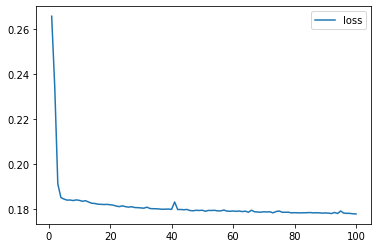

In [46]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

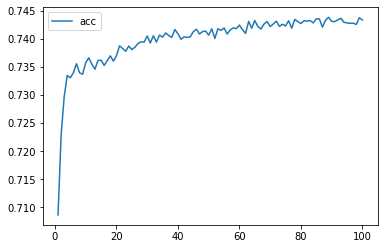

In [47]:
history_df.plot(y="acc")

As we see this is the best result so far - same accuracy but much lower loss.

Adding one more layer

In [48]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.2160 - acc: 0.7129
Epoch 2/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1960 - acc: 0.7243
Epoch 3/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1883 - acc: 0.7281
Epoch 4/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1859 - acc: 0.7308
Epoch 5/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1848 - acc: 0.7317
Epoch 6/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1847 - acc: 0.7324
Epoch 7/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1843 - acc: 0.7345
Epoch 8/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.1840 - acc: 0.7351
Epoch 9/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1839 - acc: 0.7369
Epoch 10/100
25724/25724 [==============================] - 2s 70us/sampl

25724/25724 [==============================] - 2s 83us/sample - loss: 0.1774 - acc: 0.7433
Epoch 80/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1774 - acc: 0.7435
Epoch 81/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1805 - acc: 0.7437
Epoch 82/100
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1776 - acc: 0.7441
Epoch 83/100
25724/25724 [==============================] - ETA: 0s - loss: 0.1771 - acc: 0.744 - 2s 75us/sample - loss: 0.1774 - acc: 0.7441
Epoch 84/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.1771 - acc: 0.7435
Epoch 85/100
25724/25724 [==============================] - 2s 74us/sample - loss: 0.1774 - acc: 0.7442
Epoch 86/100
25724/25724 [==============================] - 2s 75us/sample - loss: 0.1773 - acc: 0.7449
Epoch 87/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.1772 - acc: 0.7436
Epoch 88/100
25724/25724 [=============

No difference. So there is no point to add more layers. But the linear activation function in the output layer works better. What if we add more neurons to the second layer? 

In [50]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 200
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [51]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.2186 - acc: 0.7127
Epoch 2/100
25724/25724 [==============================] - 2s 85us/sample - loss: 0.1965 - acc: 0.7254
Epoch 3/100
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1925 - acc: 0.7298
Epoch 4/100
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1866 - acc: 0.7308
Epoch 5/100
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1849 - acc: 0.7329
Epoch 6/100
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1842 - acc: 0.7327
Epoch 7/100
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1844 - acc: 0.7339
Epoch 8/100
25724/25724 [==============================] - 2s 91us/sample - loss: 0.1842 - acc: 0.7343
Epoch 9/100
25724/25724 [==============================] - 2s 85us/sample - loss: 0.1840 - acc: 0.7347
Epoch 10/100
25724/25724 [==============================] - 2s 83us/sampl

25724/25724 [==============================] - 2s 86us/sample - loss: 0.1774 - acc: 0.7440
Epoch 80/100
25724/25724 [==============================] - 2s 83us/sample - loss: 0.1774 - acc: 0.7437
Epoch 81/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.1774 - acc: 0.7434
Epoch 82/100
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1774 - acc: 0.7441
Epoch 83/100
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1772 - acc: 0.7439
Epoch 84/100
25724/25724 [==============================] - 2s 91us/sample - loss: 0.1775 - acc: 0.7436
Epoch 85/100
25724/25724 [==============================] - ETA: 0s - loss: 0.1773 - acc: 0.743 - 2s 86us/sample - loss: 0.1773 - acc: 0.7439
Epoch 86/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.1770 - acc: 0.7437
Epoch 87/100
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1771 - acc: 0.7441
Epoch 88/100
25724/25724 [=============

Will add more epochs

In [52]:
# Defining the model - one layer neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 232
hidden_nodes_layer2 = 200
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [53]:
# Train the model with 200 epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=200) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
25724/25724 [==============================] - 2s 93us/sample - loss: 0.2250 - acc: 0.7144
Epoch 2/200
25724/25724 [==============================] - 3s 99us/sample - loss: 0.1942 - acc: 0.7262
Epoch 3/200
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1892 - acc: 0.7292
Epoch 4/200
25724/25724 [==============================] - 2s 92us/sample - loss: 0.1909 - acc: 0.7302
Epoch 5/200
25724/25724 [==============================] - 2s 92us/sample - loss: 0.1926 - acc: 0.7295
Epoch 6/200
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1864 - acc: 0.7326
Epoch 7/200
25724/25724 [==============================] - 2s 88us/sample - loss: 0.1849 - acc: 0.7344
Epoch 8/200
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1846 - acc: 0.7325
Epoch 9/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1841 - acc: 0.7344
Epoch 10/200
25724/25724 [==============================] - 2s 86us/sampl

25724/25724 [==============================] - 2s 93us/sample - loss: 0.1771 - acc: 0.7442
Epoch 80/200
25724/25724 [==============================] - 2s 89us/sample - loss: 0.1772 - acc: 0.7439
Epoch 81/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1772 - acc: 0.7441
Epoch 82/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1772 - acc: 0.7441
Epoch 83/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1776 - acc: 0.7433
Epoch 84/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1776 - acc: 0.7434
Epoch 85/200
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1777 - acc: 0.7432
Epoch 86/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1773 - acc: 0.7442
Epoch 87/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1774 - acc: 0.7433
Epoch 88/200
25724/25724 [==============================] - 2s 88us/sample - 

25724/25724 [==============================] - 2s 86us/sample - loss: 0.1765 - acc: 0.7446
Epoch 158/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1766 - acc: 0.7447
Epoch 159/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1764 - acc: 0.7448
Epoch 160/200
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1765 - acc: 0.7452
Epoch 161/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1765 - acc: 0.7448
Epoch 162/200
25724/25724 [==============================] - 2s 87us/sample - loss: 0.1764 - acc: 0.7444
Epoch 163/200
25724/25724 [==============================] - 2s 85us/sample - loss: 0.1764 - acc: 0.7438
Epoch 164/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1800 - acc: 0.7443
Epoch 165/200
25724/25724 [==============================] - 2s 86us/sample - loss: 0.1765 - acc: 0.7448
Epoch 166/200
25724/25724 [==============================] - 2s 86us/

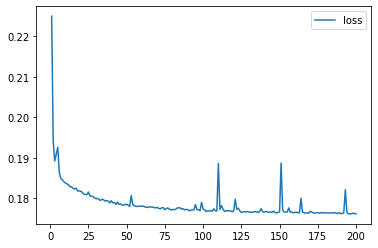

In [54]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

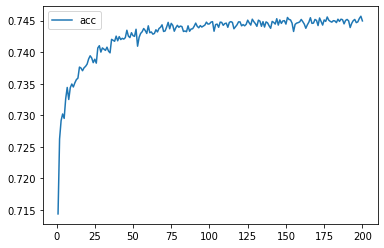

In [55]:
history_df.plot(y="acc")

### Summary: This data set may not be perfect for funding success prediction. The max result that we could get is 74.47% accuracy and 17.61% loss. 
### In the file "Extension_challenge_experiment.ipynb" I was doing an analysis with reduced features based on my own judgment - I droped "Classification" column. The goal was to test how it impacts the training. The thought process behind is that this data attribute may not be relevant to the applicant status. This feature is more like an identification because this is a goverment organization classification.

### Out of curiosity I want to apply PCA and see if reduced dimension will make a difference.

In [56]:
# Reducing the number of components to 3 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(X)
data_pca

array([[-2764198.68206174],
       [-2660608.6820607 ],
       [-2764198.68206071],
       ...,
       [-2764198.6820607 ],
       [-2764198.68206071],
       [33730980.31793932]])

In [57]:
pca.explained_variance_ratio_

array([1.])

In [58]:
# Creating a DatFrame
df_pca = pd.DataFrame(data_pca, columns=['PC1'])
df_pca

,PC1
0,-2.764199e+06
1,-2.660609e+06
2,-2.764199e+06
3,-2.762507e+06
4,-2.626609e+06
...,...
34294,-2.764199e+06
34295,-2.764199e+06
34296,-2.764199e+06
34297,-2.764199e+06


In [77]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_pca, y, random_state=78)

In [78]:
# Scale X_train and X_test
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler1 = scaler.fit(X_train1)

# Scale the data
X_train1_scaled = X_scaler1.transform(X_train)
X_test1_scaled = X_scaler1.transform(X_test1)

In [79]:
len(X_train1_scaled[0])

1

In [80]:
# Defining the model - one layer neural net
number_input_features = len(X_train1_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
# hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [81]:
# Train the model with 100 epochs
fit_model = nn.fit(X_train1_scaled, y_train1, epochs=100) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test1_scaled,y_test1,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.2661 - acc: 0.5257
Epoch 2/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2492 - acc: 0.5351
Epoch 3/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2492 - acc: 0.5360
Epoch 4/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2497 - acc: 0.5344
Epoch 5/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2492 - acc: 0.5334
Epoch 6/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.2492 - acc: 0.5340
Epoch 7/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2499 - acc: 0.5314
Epoch 8/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2490 - acc: 0.5337
Epoch 9/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.2501 - acc: 0.5326
Epoch 10/100
25724/25724 [==============================] - 1s 40us/sampl

25724/25724 [==============================] - 1s 40us/sample - loss: 0.2488 - acc: 0.5353
Epoch 80/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.2489 - acc: 0.5351
Epoch 81/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.2489 - acc: 0.5334
Epoch 82/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.2489 - acc: 0.5348
Epoch 83/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.2489 - acc: 0.5351
Epoch 84/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.2489 - acc: 0.5348
Epoch 85/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.2488 - acc: 0.5349
Epoch 86/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.2489 - acc: 0.5352
Epoch 87/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.2489 - acc: 0.5351
Epoch 88/100
25724/25724 [==============================] - 1s 40us/sample - 

##### It didn't improve the result.

### Let's see how Random forest and Logistic Regression work on this data set

Random Forest.

In [82]:
from collections import Counter
Counter(y_train)

Counter({0: 12035, 1: 13689})

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [84]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [85]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [86]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [87]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,455,3548
Actual 1,557,4015


In [88]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.5212827988338192

In [89]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,455,3548
Actual 1,557,4015


Accuracy Score : 0.5212827988338192
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.11      0.18      4003
           1       0.53      0.88      0.66      4572

    accuracy                           0.52      8575
   macro avg       0.49      0.50      0.42      8575
weighted avg       0.49      0.52      0.44      8575



Logistic Regression.

In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=78)
classifier

LogisticRegression(random_state=78)

In [91]:
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

In [92]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[   5, 3998],
       [   0, 4572]], dtype=int64)

In [93]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.500624531601299

##### Neither Random Forest or Logistic Regression does better job. So even though the neural network and deep learning result is not reaching 75%, it is still better than these two models.